<a href="https://colab.research.google.com/github/MartyWeissman/P4M-Teaching-2023/blob/main/TeachingNotebook_Math152_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teaching notebook:  Math 152, Week 9, Thursday

In this notebook, we will make a Mandelbrot set, and visualize random walks in the plane.

# The Mandelbrot set

Let $c$ be a complex number.  Begin with $z = 0$.  Repeat the process $z \mapsto z^2 + c$, over and over again.  The resulting sequence begins,
$$0, c, c^2 + c, (c^2 + c)^2 + c, \ldots.$$
Does this sequence stay bounded?  Does it grow forever?  The Mandelbrot set is the set of complex numbers $c$ for which the sequence stays bounded.

In [30]:
import numpy as np
from PIL import Image
from google.colab import files

Python can handle complex numbers with ease.  But the complex number $i$ (with $i^2 = -1$) is called `1j`.

In [31]:
test_arr = np.array([0,1,2]) + np.array([1,2,3]) * 1j
test_arr

array([0.+1.j, 1.+2.j, 2.+3.j])

In [32]:
test_arr.dtype

dtype('complex128')

Python has a data type for complex numbers, basically 64 bits for the real part, and 64 bits for the imaginary part (coefficient of $i$).

Now we make a big rectangular array of complex numbers, from $-2 - i$ up to $2+i$.

In [33]:
re_arr = np.linspace(-2,2,400)
im_arr = np.linspace(-1,1,200)
c_arr = np.add.outer(re_arr, im_arr*1j).T # Transpose the array so the final image looks good.

In [34]:
np.abs(c_arr) # Take the absolute values.  np.abs(3 + 4j) would be 5.0

array([[2.23606798, 2.2271058 , 2.21815272, ..., 2.21815272, 2.2271058 ,
        2.23606798],
       [2.23159147, 2.22261125, 2.21363999, ..., 2.21363999, 2.22261125,
        2.23159147],
       [2.22715133, 2.21815312, 2.20916376, ..., 2.20916376, 2.21815312,
        2.22715133],
       ...,
       [2.22715133, 2.21815312, 2.20916376, ..., 2.20916376, 2.21815312,
        2.22715133],
       [2.23159147, 2.22261125, 2.21363999, ..., 2.21363999, 2.22261125,
        2.23159147],
       [2.23606798, 2.2271058 , 2.21815272, ..., 2.21815272, 2.2271058 ,
        2.23606798]])

In [35]:
def make_mandel(num_iter = 100):
  '''
  Makes an array of True/False, depending on boundedness of process.
  '''
  arr = np.zeros(c_arr.shape)
  b_arr = np.full(c_arr.shape, 0) # 0 is bounded.
  for t in range(num_iter):
    arr = arr**2 + c_arr
    arr_size = np.abs(arr)
    is_bded = (arr_size < 2) # If it hits 2, is escapes!
    b_arr = b_arr + (is_bded) # Tracking escape time!
    arr = (arr * (is_bded)) + (2*(1-is_bded)) # A trick to implementing an if-switch with vectorized computations.
  return b_arr, is_bded

In [36]:
esc_time, mbrot = make_mandel()

In [37]:
pixels = np.zeros((c_arr.shape[0], c_arr.shape[1], 3)) # RGB channels
pixels[:,:,0] = mbrot*255
pixels[:,:,1] = mbrot*255
pixels[:,:,2] = mbrot*255
pixels[:,:,0] += (100*esc_time % 255)
pixels[:,:,1] += (37*esc_time % 255)
pixels = np.clip(pixels,0,255)


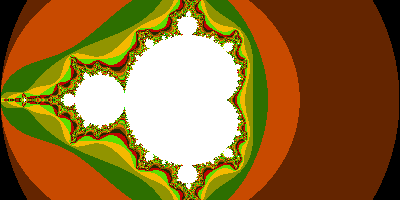

In [38]:
img = Image.fromarray(pixels.astype(np.uint8))
display(img)

# Random walks in the plane

Consider a bunch of bots, walking in a box.

First we put 100,000 bots at the origin.

In [39]:
num_bots = 100000
bots = np.zeros((num_bots,2)) # 10000 bots, two coordinates.

Bot 0 -- where are you?

In [40]:
bots[0]

array([0., 0.])

Now bots -- go for a 1000 step walk!

In [41]:
for t in range(1000):
  step = np.random.uniform(-1,1,(num_bots,2))
  bots = bots + step

Bot 0... where are you now?

In [42]:
bots[0]

array([10.90437515,  2.3427694 ])

In [43]:
counts = np.histogram2d(bots[:,0], bots[:,1], bins=300)[0] # Count the number of bots in a 300x300 grid.
counts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
cmax = np.max(counts)
cmax

23.0

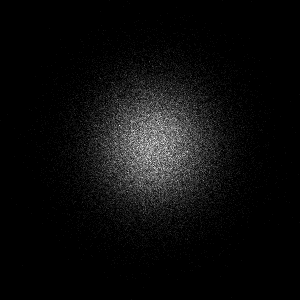

In [45]:
pixels = counts*255 / cmax # scale so maximum = white, minimum = black.
pixels = pixels.astype(np.uint8) # PIL only likes 8-bit unsigned integers.
img = Image.fromarray(pixels) # Make the image.
display(img) # Display the image.


In [46]:
pixels.max()

255